Throughout this lesson, you've been trying different models on the same two datasets, wine and diabetes. Now, we're going to try our hand at accelerating this methodology by using AutoGluon. In this exercise, train two different AutonGluon models and see how they compare to previous iterations in exercise 1 and 2.

You're tasked with completing the following steps:
1. Load in the wine dataset from scikit learn.
2. For the wine dataset, create a train and test split, 80% train / 20% test.
3. Create a AutoGluon Classifier model with these hyper parameters:
    1. time_limit: 120
    2. presets: best_quality
4. Output the model table summary
5. Evaluate the trained model on the test dataset
6. Load the diabetes dataset from scikit learn
7. For the Diabetes dataset, create a train and test split, 80% train / 20% test.
8. Create a AutoGluon Regression model with these hyper parameters:
    1. eval_metric: r2
    2. time_limit: 120
    3. presets: best_quality
9. Output the model table summary
10. Evaluate the trained model on the test dataset

## Setup

### Open up Sagemaker Studio

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

## AutoGluon Classifier

In [2]:
# Load in the wine dataset
wine = datasets.load_wine()

In [3]:
# Create the wine `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Include the target as well
df['target'] = wine.target

In [4]:
# Split your data with these ratios: train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df, test_size=0.2)

In [5]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a classifier, autogluon will pick it up
predictor = TabularPredictor(label="target").fit(
    train_data=df_train,
    time_limit=60,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230915_032104/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=5, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20230915_032104/"
AutoGluon Version:  0.8.2
Python Version:     3.9.6
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 22.1.0: Sun Oct  9 20:14:54 PDT 2022; root:xnu-8792.41.9~2/RELEASE_X86_64
Disk Space Avail:   4.61 GB / 250.69 GB (1.8%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    142
Train Data Columns: 13
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [0, 1, 2]
	If 'multiclass' is not the correct problem_type,

2023-09-14 22:21:36,196	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-14 22:21:36,203	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-14 22:21:36,207	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-14 22:21:36,213	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
		ray::_ray_fit() (pid=97772, ip=127.0.0.1)
  File "/Users/geoom/miniconda3/envs/udacity-aml

In [6]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0          CatBoost_BAG_L1   1.000000       0.005958  6.083362                0.005958           6.083362            1       True          6
1      WeightedEnsemble_L2   1.000000       0.006529  6.517073                0.000571           0.433711            2       True         10
2   NeuralNetFastAI_BAG_L1   0.992958       0.048602  4.806840                0.048602           4.806840            1       True          3
3    ExtraTreesGini_BAG_L1   0.992958       0.081466  0.410955                0.081466           0.410955            1       True          7
4    ExtraTreesEntr_BAG_L1   0.992958       0.089906  0.686747                0.089906           0.686747            1       True          8
5  RandomForestEntr_BAG_L1   0.992958       0.092793  0.503366                0.092793      

/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6549295774647887,
  'KNeighborsDist_BAG_L1': 0.6830985915492958,
  'NeuralNetFastAI_BAG_L1': 0.9929577464788732,
  'RandomForestGini_BAG_L1': 0.9929577464788732,
  'RandomForestEntr_BAG_L1': 0.9929577464788732,
  'CatBoost_BAG_L1': 1.0,
  'ExtraTreesGini_BAG_L1': 0.9929577464788732,
  'ExtraTreesEntr_BAG_L1': 0.9929577464788732,
  'XGBoost_BAG_L1': 0.971830985915493,
  'Weighte

<Axes: xlabel='model'>

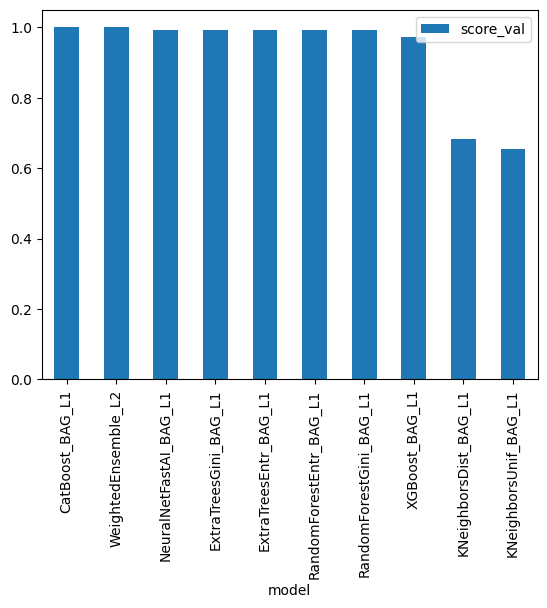

In [13]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [7]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(df_test)

Evaluation: accuracy on test data: 0.9444444444444444
Evaluations on test data:
{
    "accuracy": 0.9444444444444444,
    "balanced_accuracy": 0.9607843137254902,
    "mcc": 0.916561620105467
}


## AutoGluon Regression

In [5]:
# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

In [6]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
dfd = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])

# Include the target as well
dfd['target'] = diabetes["target"]

In [7]:
# Split your data with these ratios: train: 0.8 | test: 0.2
dfd_train, dfd_test = train_test_split(dfd, test_size=0.2)

In [8]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a regression, autogluon will pick it up
predictor = TabularPredictor(
    label="target", problem_type="regression", eval_metric="r2"
).fit(
    train_data=dfd_train,
    time_limit=120,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230915_042415/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=5, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20230915_042415/"
AutoGluon Version:  0.8.2
Python Version:     3.9.6
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 22.1.0: Sun Oct  9 20:14:54 PDT 2022; root:xnu-8792.41.9~2/RELEASE_X86_64
Disk Space Avail:   4.75 GB / 250.69 GB (1.9%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    353
Train Data Columns: 10
Label Column: target
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5380.27 MB
	Train Data (Original)  Memory Usage: 0.03 MB (0.0% of available memory)
	In

	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy
2023-09-14 23:24:39,680	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): ray::_ray_fit() (pid=1845, ip=127.0.0.1)
  File "/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/site-packages/lightgbm/__init__.py", line 8, in <module>
    from .basic import Booster, Dataset, Sequence, register_logger
  File "/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/site-packages/lightgbm/basic.py", line 110, in <module>
    _LIB = _load_lib()
  File "/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/site-packages/lightgbm/basic.py", line 101, in _load_lib
    lib = ctypes.cdll.LoadLibrary(lib_path[0])
  File "/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/ctypes/__init__.py", line 460, in LoadLibrary
    return self._dlltype(name)
  File "/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/ctypes/__init__.py", line 382, in __init__
    self._hand

		ray::_ray_fit() (pid=1846, ip=127.0.0.1)
  File "/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/site-packages/lightgbm/__init__.py", line 8, in <module>
    from .basic import Booster, Dataset, Sequence, register_logger
  File "/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/site-packages/lightgbm/basic.py", line 110, in <module>
    _LIB = _load_lib()
  File "/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/site-packages/lightgbm/basic.py", line 101, in _load_lib
    lib = ctypes.cdll.LoadLibrary(lib_path[0])
  File "/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/ctypes/__init__.py", line 460, in LoadLibrary
    return self._dlltype(name)
  File "/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/ctypes/__init__.py", line 382, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen(/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/li

Completed 1/20 k-fold bagging repeats ...
2023-09-14 23:26:13,695	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
Fitting model: WeightedEnsemble_L2 ... Training model for up to 119.92s of the 1.98s of remaining time.
2023-09-14 23:26:13,705	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-14 23:26:13,713	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-14 23:26:13,716	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check

In [9]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2   0.536304       0.155418  32.466172                0.001243           0.719285            2       True          9
1   NeuralNetTorch_BAG_L1   0.529465       0.092262  22.748011                0.092262          22.748011            1       True          8
2  NeuralNetFastAI_BAG_L1   0.484397       0.061914   8.998876                0.061914           8.998876            1       True          6
3         CatBoost_BAG_L1   0.469902       0.007448   6.497852                0.007448           6.497852            1       True          4
4    ExtraTreesMSE_BAG_L1   0.467616       0.136232   0.456239                0.136232           0.456239            1       True          5
5  RandomForestMSE_BAG_L1   0.430301       0.096851   0.584897                0.096851      

/Users/geoom/miniconda3/envs/udacity-amle/lib/python3.9/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.3642258688350546,
  'KNeighborsDist_BAG_L1': 0.36986350940383417,
  'RandomForestMSE_BAG_L1': 0.4303007271958048,
  'CatBoost_BAG_L1': 0.4699018110900537,
  'ExtraTreesMSE_BAG_L1': 0.46761639328118276,
  'NeuralNetFastAI_BAG_L1': 0.4843970896890163,
  'XGBoost_BAG_L1': 0.3126272497719643,
  'NeuralNetTorch_BAG_L1': 0.5294653214615135,
  'WeightedEnsemble_L2': 0.5363038149778911},
 'model_best': 'WeightedEnsemble_L2'

<Axes: xlabel='model'>

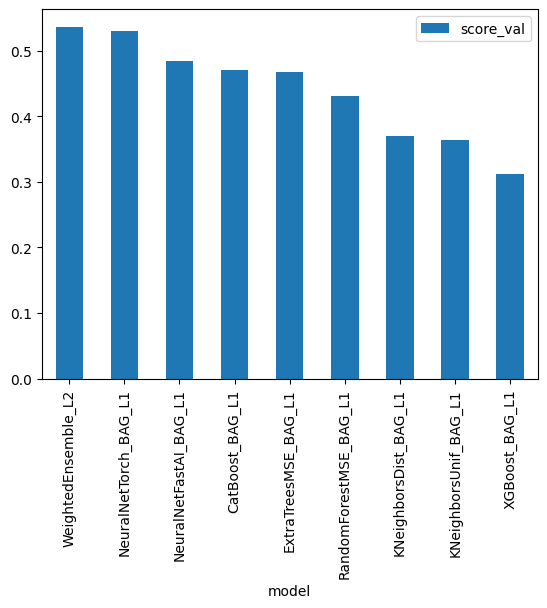

In [10]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(dfd_test)